# How to Uniformly Sample Points in a Circle

For any reason, we want to sample points uniformly in a circle.

We can sample values for $r$ and $\theta$ in polar coordinates and then visualize the points with a scatter plot to see if it went well...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.facecolor"] = (1.0, 1.0, 1.0, 1)
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams["axes.titlesize"] = "x-large"
plt.rcParams["axes.labelsize"] = "x-large"
plt.rcParams["xtick.labelsize"] = "x-large"
plt.rcParams["ytick.labelsize"] = "x-large"

In [3]:
N = 10000

In [4]:
r = np.random.uniform(size=N)
theta = np.random.uniform(0, 2 * np.pi, size=N)

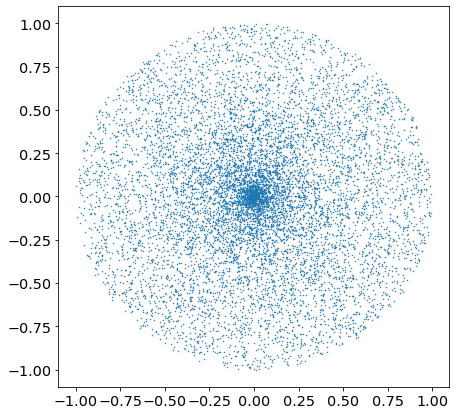

In [5]:
plt.scatter(r * np.cos(theta), r * np.sin(theta), s=1, marker=".")
plt.show()

Something is wrong here. The density around the center is too high compared to the rest.

## Intuitive Explanation

Let's vary the value of $\theta$ for two values of $r$.

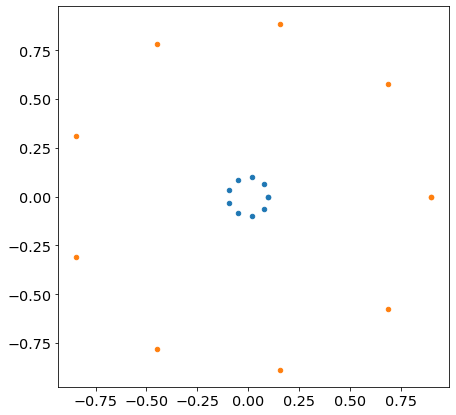

In [6]:
theta_lin = np.linspace(0, 2 * np.pi, 10)
plt.scatter(0.1 * np.cos(theta_lin), 0.1 * np.sin(theta_lin), s=20)
plt.scatter(0.9 * np.cos(theta_lin), 0.9 * np.sin(theta_lin), s=20)
plt.show()

At fixed number of points sampled (here $10$), it's obvious that the bigger $r$, the lower the density around the circle or radius $r$.

Thus, the further away from the center, the more we need to sample points in order to rebalance the densities for each radius.

This explanation however doesn't tell us how to sample the right way.

A solution is to sample in cartesian coordinates $x$ and $y$ directly, and remove points falling outside of the circle.

But we can do better (¬‿¬)

## Mathematical Explanation

![](area.png)

For small variations of $r$ and $\theta$, we have a small variation of area $dA$:

$$dArea = rdrd\theta$$

We can see that the extra $r$ will scale the density. Instead, we can rewrite it that way:

$$dArea = \frac{1}{2}d(r^2)d\theta$$

The solution is to sample uniformly in $\theta$ and in $u = r^2$ that is $r=\sqrt{u}$.

Let's try this solution:

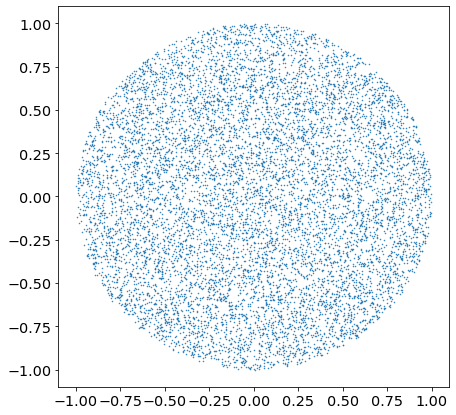

In [7]:
plt.scatter(np.sqrt(r) * np.cos(theta), np.sqrt(r) * np.sin(theta), s=1, marker=".")
plt.show()